###########################

# **Graduating Project : MSc International Finance**

###########################

**Topic**: How can AI shorten the pre-M&A process: On the interest of using a Supervised Machine Learning approach to predict firm’s acquisition.

**Objective**: Predict M&A deal outcome using sypervised ML technics

**Technics**: Supervised Machine Learning (Logistic Regression, SVM, Decision Tree)

Rennes SB

Author: Adrien Bonhommeau

Supevisor: Dr. Amir Sadoghi



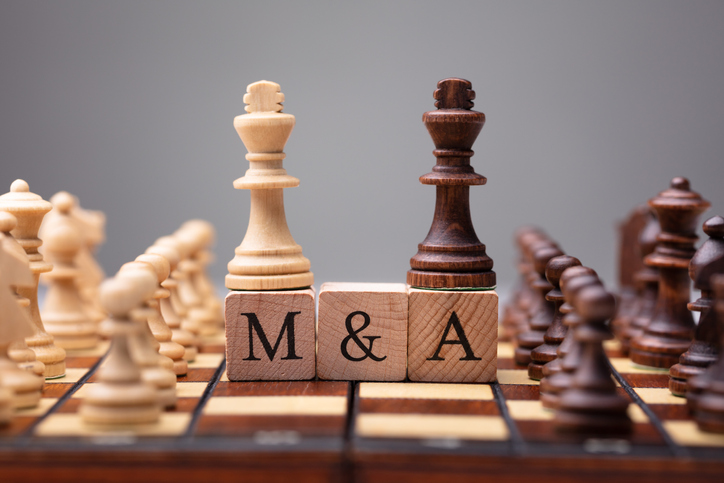

# **Libraries import**

In [ ]:
# import packages

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # import vizualization tools
import itertools # advanced tools set
import seaborn as sns # advanced data visualization

from termcolor import colored as cl # text customization
from sklearn import metrics
from sklearn.model_selection import train_test_split # split data set
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm

# Logistic Regression
from sklearn.linear_model import LogisticRegression 

# Support Vector Machine
from sklearn.svm import SVC # import SVM tools

# Decision Tree
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm


# import confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, recall_score, classification_report, f1_score, auc


# **Exploring the data**

In [ ]:
# Import the CSV file
# Dataset has been downloaded from Bloomberg terminal (at Rennes SB's Bloomberg room)

from google.colab import files
df = files.upload()



Saving Datasetv2.csv to Datasetv2.csv


In [ ]:
# Import Data from CSV file
df = pd.read_csv("Datasetv2.csv")
df.head(5)

,Deal_Type,Class,Valuation_Index,Liquidity_Index,Sales_Index,Leverage_Index,Profitability_Index,Employees_Index
0,M&A,1,0.843311,1.380794,0.388009,0.495309,0.681943,0.109091
1,M&A,1,0.268940,2.502929,0.245625,0.601950,0.534041,0.069767
2,M&A,1,13.403385,0.809119,3.748340,2.037274,0.784553,0.526882
3,M&A,1,0.382593,2.725530,0.302446,0.611721,0.715211,0.102545
4,M&A,1,0.772213,1.714339,0.717924,1.211360,0.554317,0.184536


In [ ]:
# Valuation Index = Enterprise Value / EBITDA	
# Liquidity Index = Current Assets / Current Liabilities
# Sales Index = Sales / Average Sales of the firms
# Leverage Index = Debt/EBITDA
# Profitability Index = EBITDA/Sales
# Employees Index = Target / Acquirer nber of employees

In [ ]:
cases = len(df)
Deal_success = len(df[df.Class == 1])
Deal_failure = len(df[df.Class == 0])
Acquisition_percentage = round(Deal_success/cases*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases is {}'.format(cases), attrs = ['bold']))
print(cl('Number of deal succes is {}'.format(Deal_success), attrs = ['bold']))
print(cl('Number of deal falures is {}'.format(Deal_failure), attrs = ['bold']))
print(cl('Percentage of Acqusition is {}%'.format(Acquisition_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases is 921
Number of deal succes is 823
Number of deal falures is 98
Percentage of Acqusition is 89.36%
--------------------------------------------


# **Histograms**

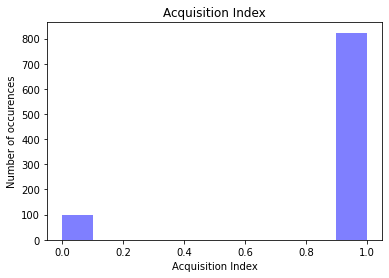

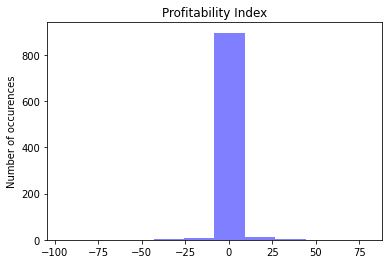

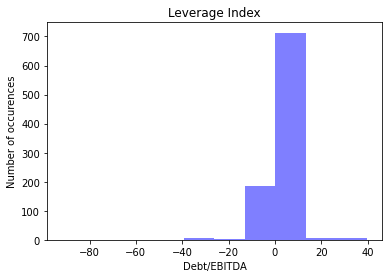

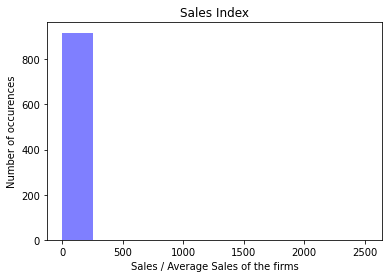

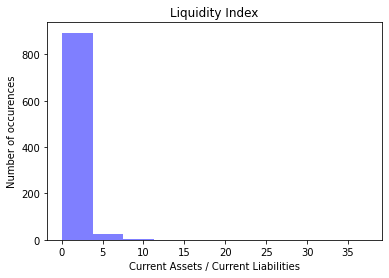

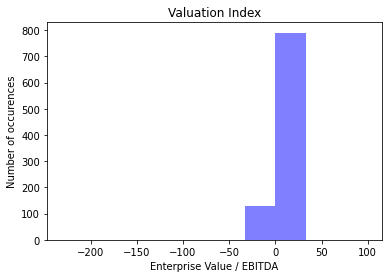

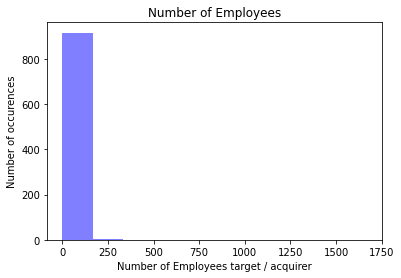

In [ ]:
#Plot the histograms of variables for potential use in a model

# ACQUISITION INDEX 
#######################################################
#Acquisition Index (Class) (Dumb value: 0 for success, 1 for deal)
plt.hist(df['Class'], facecolor='blue', alpha=0.5)
plt.title("Acquisition Index")
plt.ylabel("Number of occurences")
plt.xlabel("Acquisition Index")
plt.show()   
#######################################################

# PROFITABILITY INDEX 
#######################################################
#Profitability Index (EBITDA/Sales)
plt.hist(df['Profitability_Index'], facecolor='blue', alpha=0.5)
plt.title("Profitability Index")
plt.ylabel("Number of occurences")
plt.show()   
#######################################################

# LEVERAGE INDEX 
#######################################################
#Leverage Index (Debt/EBITDA)
plt.hist(df['Leverage_Index'], facecolor='blue', alpha=0.5)
plt.title("Leverage Index")
plt.ylabel("Number of occurences")
plt.xlabel("Debt/EBITDA")
plt.show()   
#######################################################

# SALES INDEX 
#######################################################
#Sales Index (Sales / Average Sales of the firms)
plt.hist(df['Sales_Index'], facecolor='blue', alpha=0.5)
plt.title("Sales Index")
plt.ylabel("Number of occurences")
plt.xlabel("Sales / Average Sales of the firms")
plt.show()  
#######################################################

# LIQUIDITY INDEX 
#######################################################
#Liquidity Index (Current Assets / Current Liabilities)
plt.hist(df['Liquidity_Index'], facecolor='blue', alpha=0.5)
plt.title("Liquidity Index")
plt.ylabel("Number of occurences")
plt.xlabel("Current Assets / Current Liabilities")
plt.show()  
#######################################################

# VALUATION INDEX
#######################################################
#Valuation Index (Enterprise Value / EBITDA)
plt.hist(df['Valuation_Index'], facecolor='blue', alpha=0.5)
plt.title("Valuation Index")
plt.ylabel("Number of occurences")
plt.xlabel("Enterprise Value / EBITDA")
plt.show()  
#######################################################

# EMPLOYEE NUMBER INDEX 
#######################################################
#Number of Employees
plt.hist(df['Employees_Index'], facecolor='blue', alpha=0.5)
plt.title("Number of Employees")
plt.ylabel("Number of occurences")
plt.xlabel("Number of Employees target / acquirer")
plt.show()   
#######################################################

# **Correlation Matrix**

                        Class  ...  Employees_Index
Class                1.000000  ...        -0.007171
Valuation_Index      0.086015  ...        -0.159265
Liquidity_Index      0.041009  ...        -0.008895
Sales_Index         -0.102085  ...         0.501648
Leverage_Index      -0.021862  ...        -0.006678
Profitability_Index -0.007894  ...        -0.010528
Employees_Index     -0.007171  ...         1.000000

[7 rows x 7 columns]


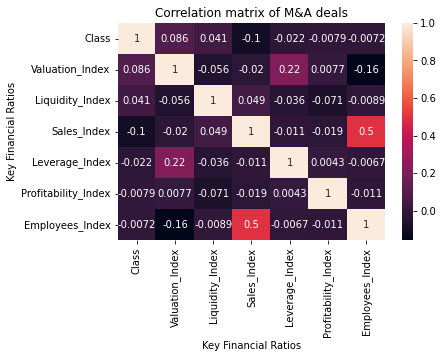

In [ ]:
# Correlation Matrix

# Numeric columns of the dataset
numeric_col = ['Class','Valuation_Index','Liquidity_Index','Sales_Index','Leverage_Index','Profitability_Index','Employees_Index']
 
# Correlation Matrix formation
corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)
 
#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)

plt.title("Correlation matrix of M&A deals", y=-0.75)

plt.xlabel("Key Financial Ratios")

plt.ylabel("Key Financial Ratios")

plt.show()

# FINDINGS: some variables are more correlated (positively or negatively) to the "Class" variable and will be useful and used in our models for this characteristic.

The previous correlation matrix shows that some variables are more correlated with **Class** than others:

*   Sales_Index (corr_coeff = -0.1)
*   Valuation_Index (corr_coeff = -0.086)
*   Liquidity_Index (corr_coeff = 0.041)





# **Data Analysis**

In [ ]:
#Here we choose the predictor variables that we identified in the correlation matrix to be used in the models.

feature_cols = ['Sales_Index','Valuation_Index','Liquidity_Index']

# DATA SPLIT

X = df[feature_cols] # predictor
y = df['Class'] # response

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:10])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:10])

X_train samples :       Sales_Index  Valuation_Index  Liquidity_Index
171      0.57853          0.48447         0.671397
X_test samples :       Sales_Index  Valuation_Index  Liquidity_Index
306     0.123249         0.444982         1.230393
y_train samples :  171    0
392    1
737    1
703    1
457    1
918    1
107    1
653    1
133    1
601    1
Name: Class, dtype: int64
y_test samples :  306    0
712    1
298    0
467    0
253    0
230    1
880    1
14     1
202    1
31     1
Name: Class, dtype: int64


In [ ]:
# 3. Confusion Matrix configuration
# Configuration  of the confusion matrix to be used for the models
# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# **Modelling Test size = 40%**



------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.5319148936170213
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.5526315789473685
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6562500000000001
------------------------------------------------------------------------


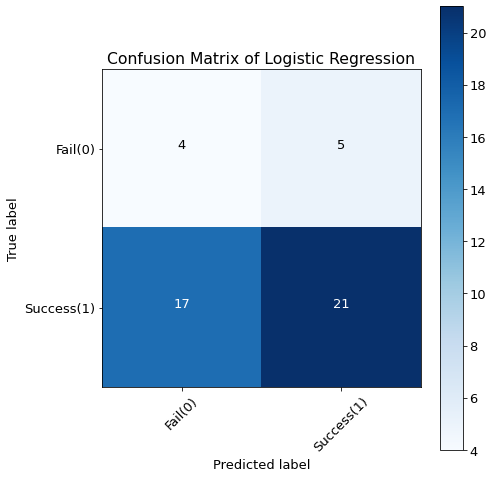

              precision    recall  f1-score   support

           0       0.19      0.44      0.27         9
           1       0.81      0.55      0.66        38

    accuracy                           0.53        47
   macro avg       0.50      0.50      0.46        47
weighted avg       0.69      0.53      0.58        47

ROC_AUC: 0.4985380116959065


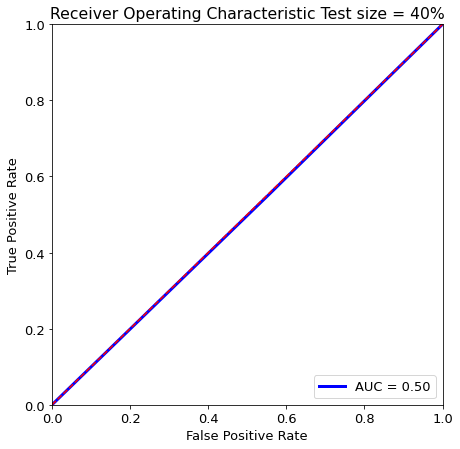

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.7872340425531915
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.9736842105263158
------------------------------------------------------------------------
F1 score of the SVM model is 0.8809523809523809
------------------------------------------------------------------------


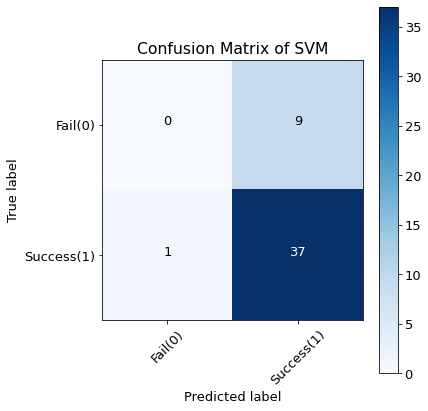

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.80      0.97      0.88        38

    accuracy                           0.79        47
   macro avg       0.40      0.49      0.44        47
weighted avg       0.65      0.79      0.71        47

ROC_AUC: 0.4868421052631579


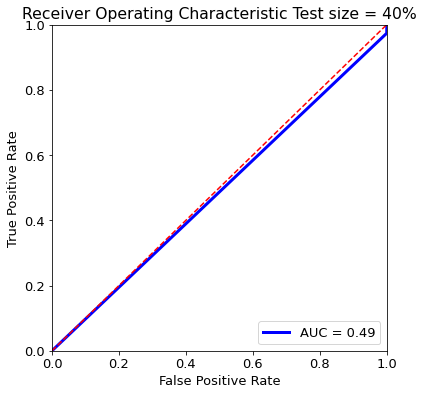

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.40425531914893614
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.3157894736842105
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.46153846153846156
------------------------------------------------------------------------


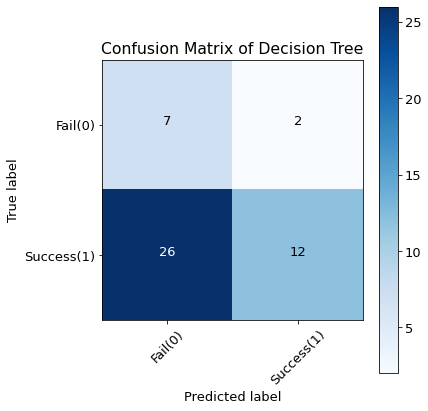

              precision    recall  f1-score   support

           0       0.21      0.78      0.33         9
           1       0.86      0.32      0.46        38

    accuracy                           0.40        47
   macro avg       0.53      0.55      0.40        47
weighted avg       0.73      0.40      0.44        47

ROC_AUC: 0.5467836257309941


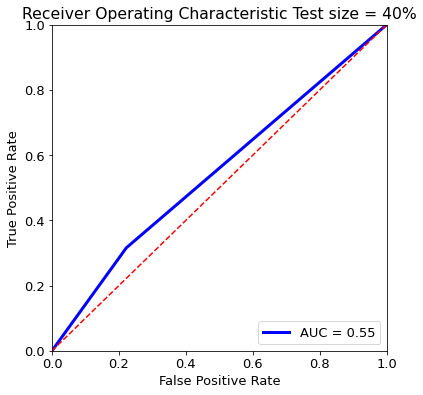

In [ ]:
#MODELLING: test_size = 40%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 40%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


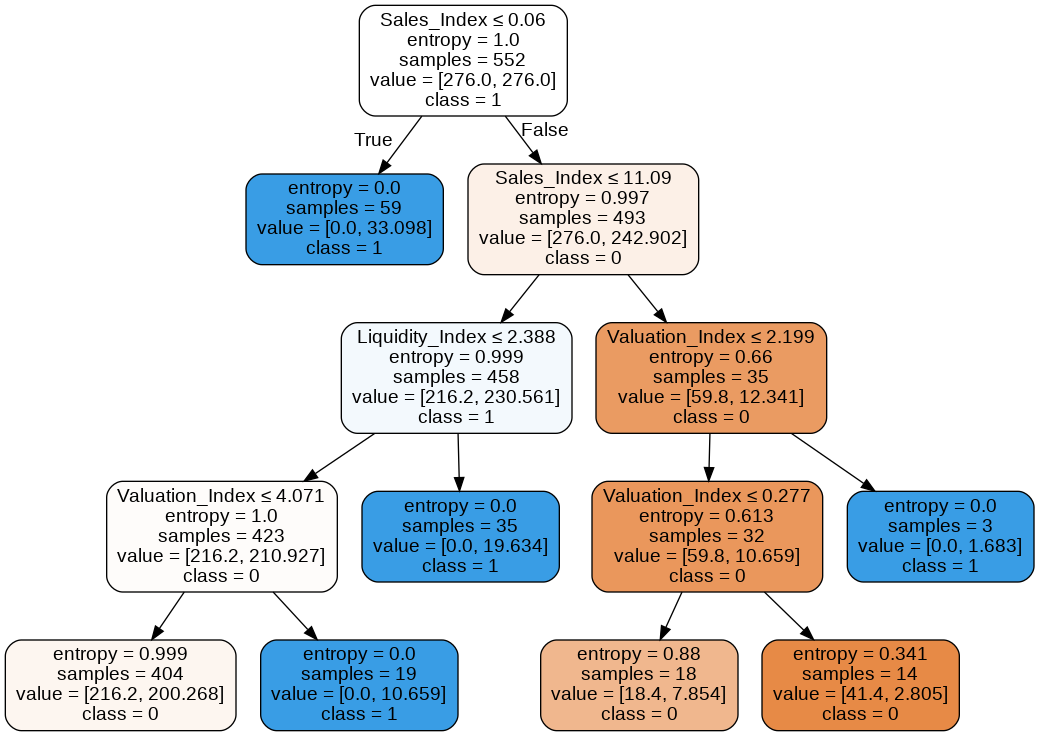

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

# **Modelling Test size = 30%**


------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.5415162454873647
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.5387755102040817
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.6751918158567776
------------------------------------------------------------------------


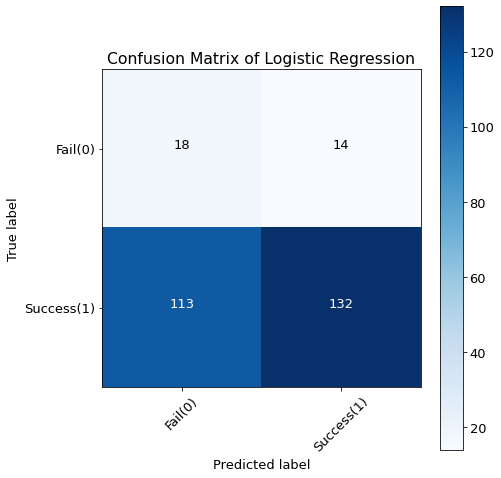

              precision    recall  f1-score   support

           0       0.14      0.56      0.22        32
           1       0.90      0.54      0.68       245

    accuracy                           0.54       277
   macro avg       0.52      0.55      0.45       277
weighted avg       0.82      0.54      0.62       277

ROC_AUC: 0.5506377551020408


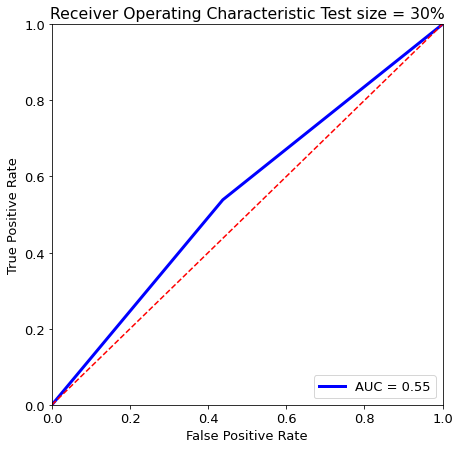

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.8736462093862816
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.9755102040816327
------------------------------------------------------------------------
F1 score of the SVM model is 0.9317738791423001
------------------------------------------------------------------------


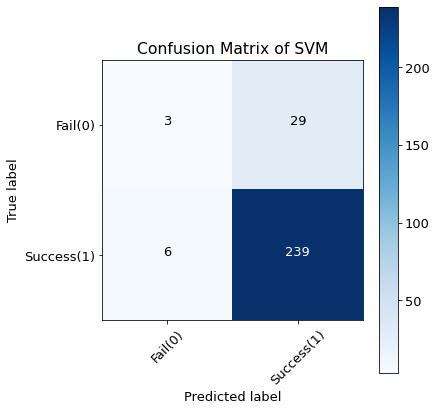

              precision    recall  f1-score   support

           0       0.33      0.09      0.15        32
           1       0.89      0.98      0.93       245

    accuracy                           0.87       277
   macro avg       0.61      0.53      0.54       277
weighted avg       0.83      0.87      0.84       277

ROC_AUC: 0.5346301020408163


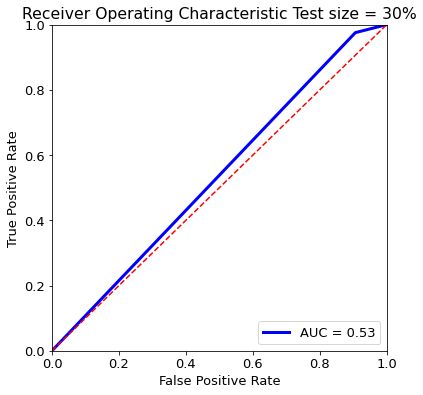

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.6931407942238267
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.7428571428571429
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8106904231625837
------------------------------------------------------------------------


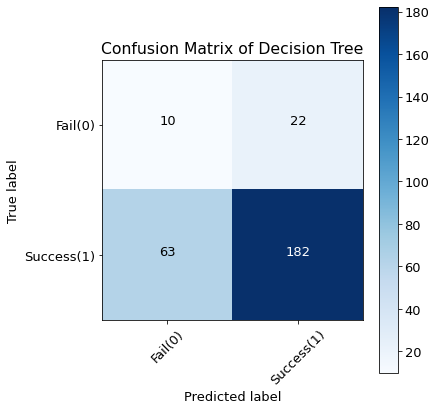

              precision    recall  f1-score   support

           0       0.14      0.31      0.19        32
           1       0.89      0.74      0.81       245

    accuracy                           0.69       277
   macro avg       0.51      0.53      0.50       277
weighted avg       0.80      0.69      0.74       277

ROC_AUC: 0.5276785714285714


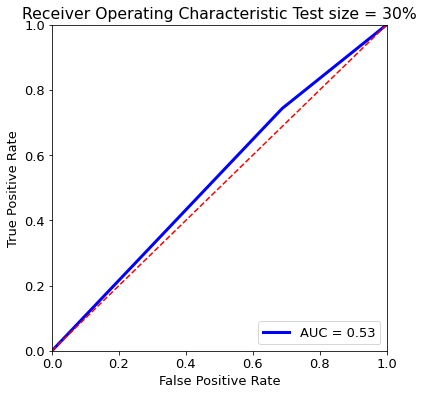

In [ ]:
#MODELLING: test_size = 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 30%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 30%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 30%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


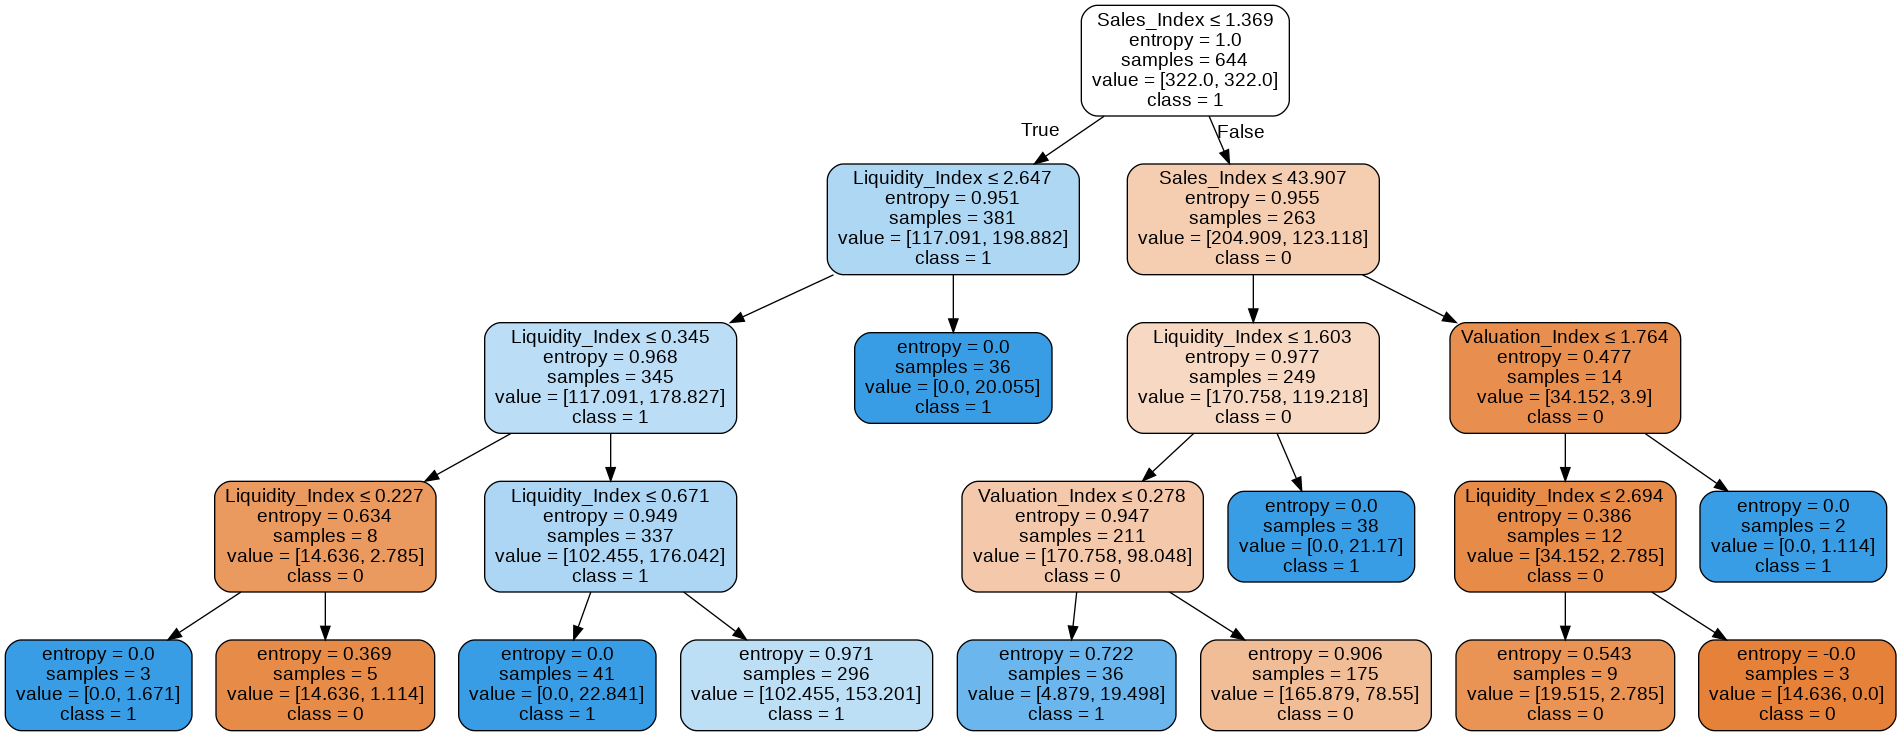

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

# **Modelling Test size = 20%**


------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9057971014492754
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 1.0
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.9505703422053232
------------------------------------------------------------------------


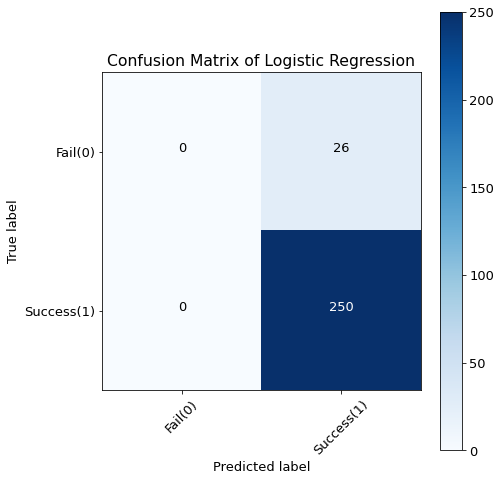

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.91      1.00      0.95       250

    accuracy                           0.91       276
   macro avg       0.45      0.50      0.48       276
weighted avg       0.82      0.91      0.86       276

ROC_AUC: 0.5


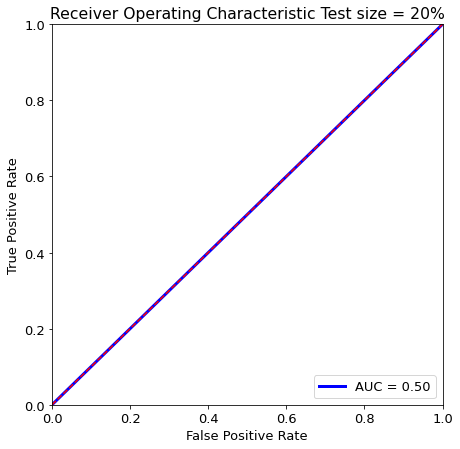

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.13043478260869565
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.044
------------------------------------------------------------------------
F1 score of the SVM model is 0.08396946564885496
------------------------------------------------------------------------


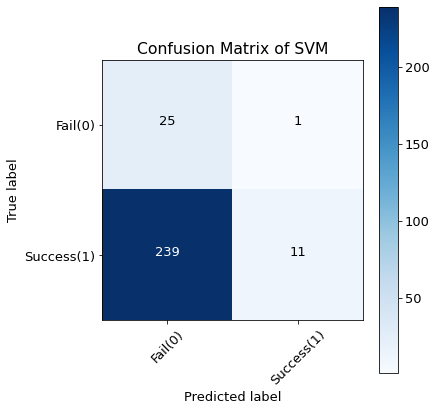

              precision    recall  f1-score   support

           0       0.09      0.96      0.17        26
           1       0.92      0.04      0.08       250

    accuracy                           0.13       276
   macro avg       0.51      0.50      0.13       276
weighted avg       0.84      0.13      0.09       276

ROC_AUC: 0.5027692307692307


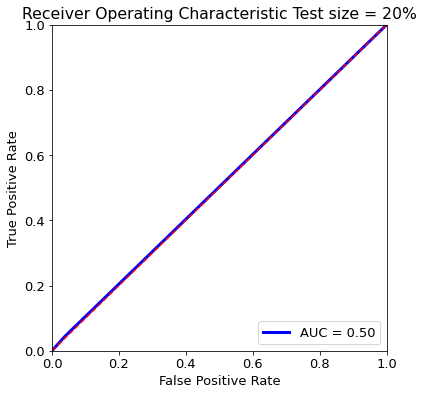

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.7318840579710145
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.764
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8377192982456141
------------------------------------------------------------------------


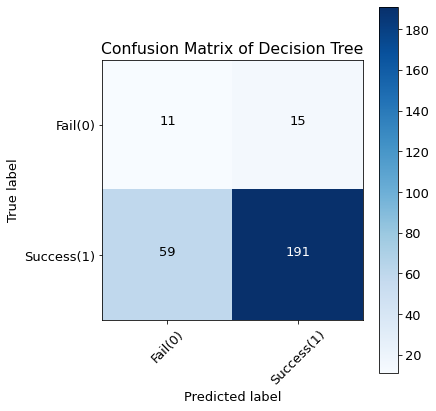

              precision    recall  f1-score   support

           0       0.16      0.42      0.23        26
           1       0.93      0.76      0.84       250

    accuracy                           0.73       276
   macro avg       0.54      0.59      0.53       276
weighted avg       0.85      0.73      0.78       276

ROC_AUC: 0.5935384615384616


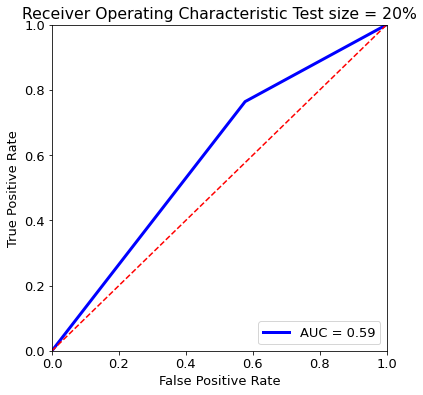

In [ ]:
#MODELLING: test_size = 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 20%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 20%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 20%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

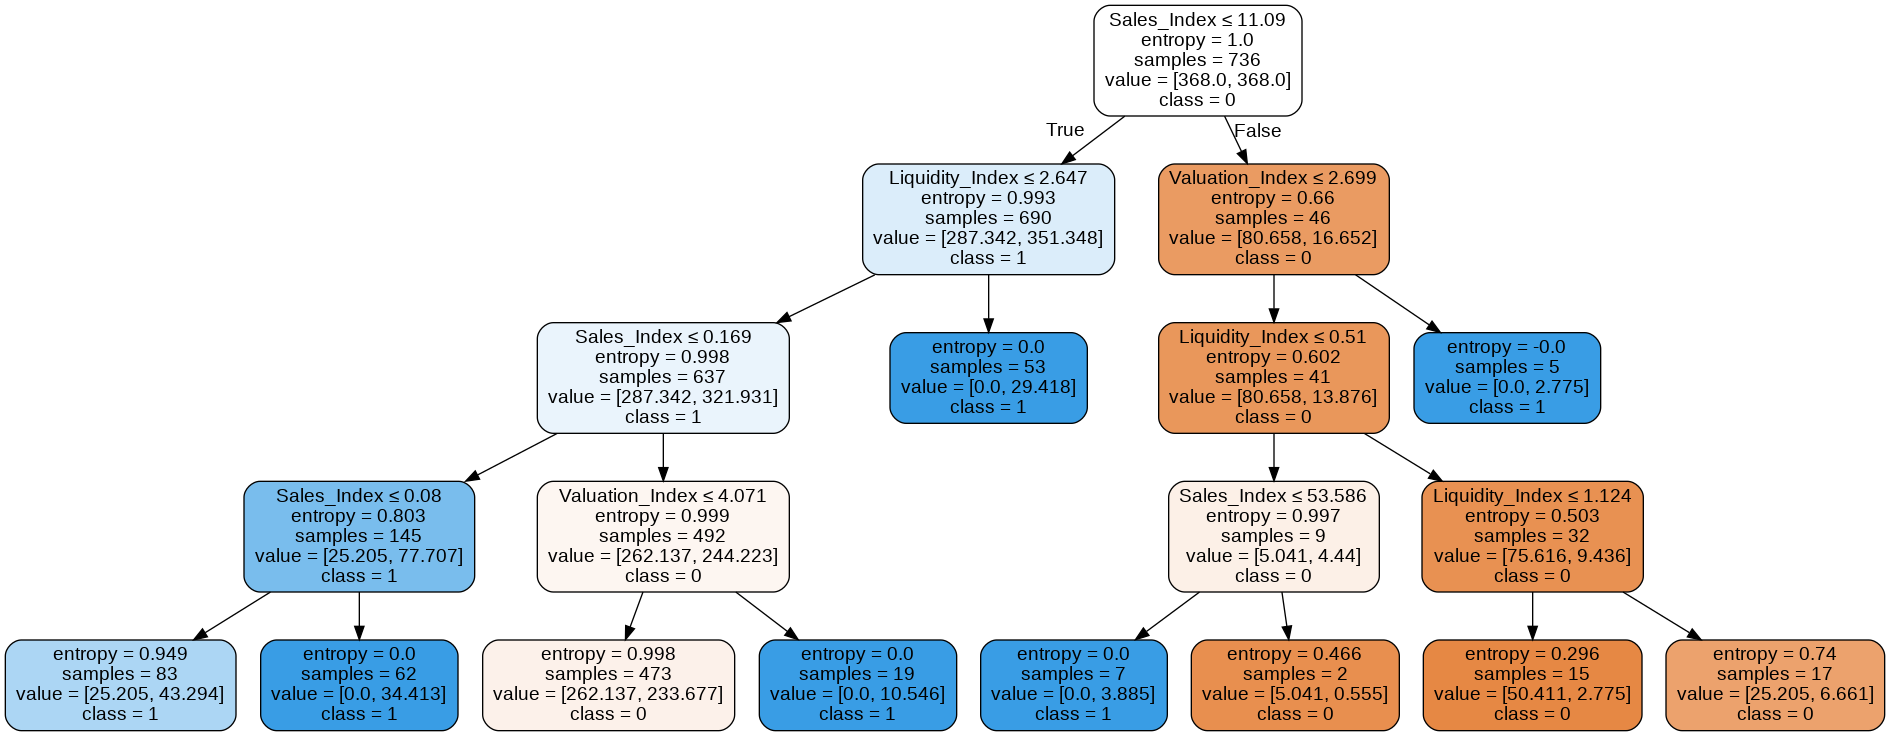

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

# **Modelling Test size = 10%**



------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.5698924731182796
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.5925925925925926
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7058823529411765
------------------------------------------------------------------------


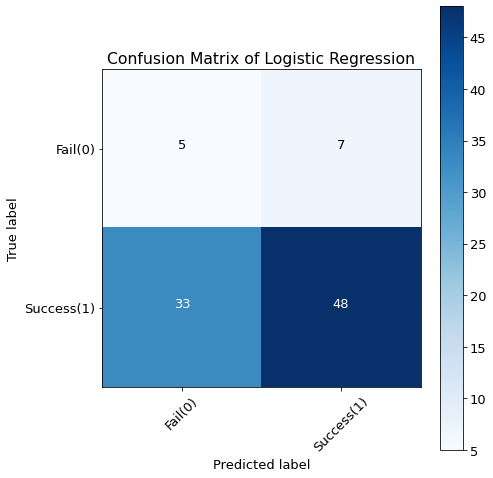

              precision    recall  f1-score   support

           0       0.13      0.42      0.20        12
           1       0.87      0.59      0.71        81

    accuracy                           0.57        93
   macro avg       0.50      0.50      0.45        93
weighted avg       0.78      0.57      0.64        93

ROC_AUC: 0.5046296296296295


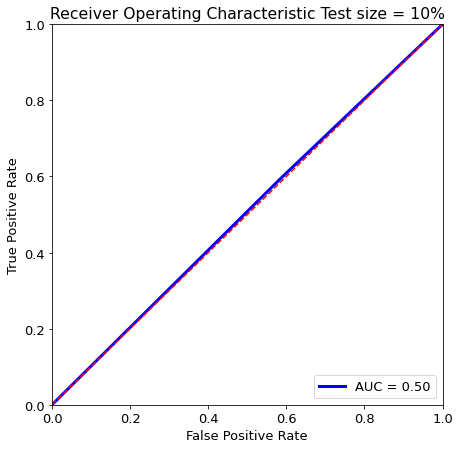

------------------------------------------------------------------------
Accuracy score of the SVM model is 0.8172043010752689
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.9382716049382716
------------------------------------------------------------------------
F1 score of the SVM model is 0.8994082840236687
------------------------------------------------------------------------


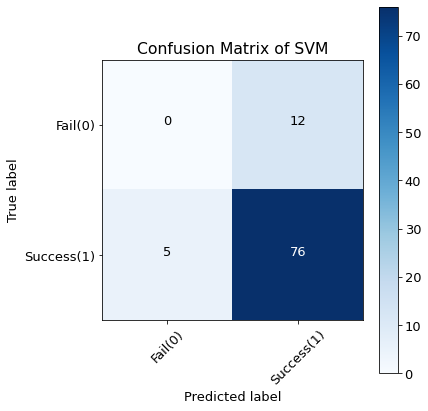

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.86      0.94      0.90        81

    accuracy                           0.82        93
   macro avg       0.43      0.47      0.45        93
weighted avg       0.75      0.82      0.78        93

ROC_AUC: 0.4691358024691358


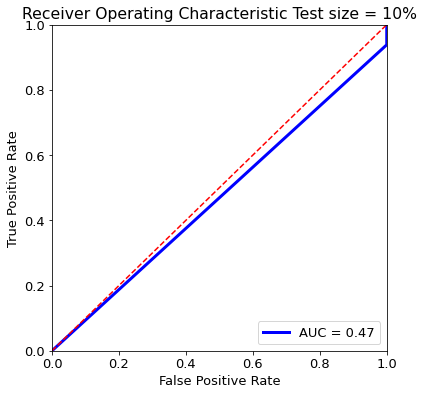

------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.6989247311827957
------------------------------------------------------------------------
Recall score of the Logistic Regression model is 0.7160493827160493
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8055555555555556
------------------------------------------------------------------------


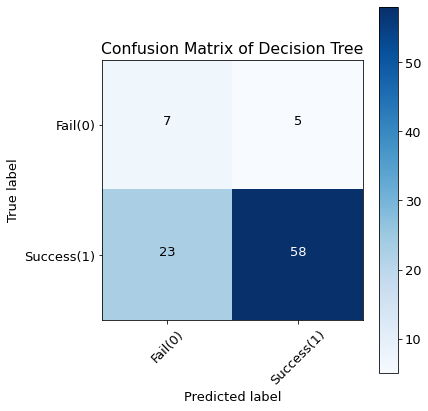

              precision    recall  f1-score   support

           0       0.23      0.58      0.33        12
           1       0.92      0.72      0.81        81

    accuracy                           0.70        93
   macro avg       0.58      0.65      0.57        93
weighted avg       0.83      0.70      0.74        93

ROC_AUC: 0.6496913580246912


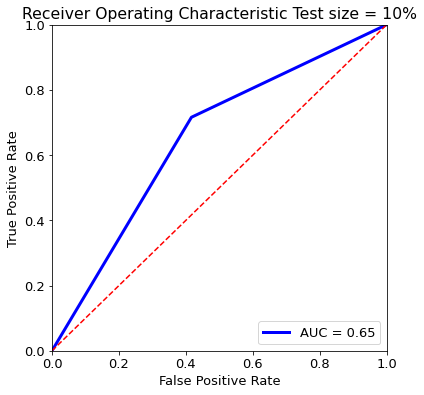

In [ ]:
#MODELLING: test_size = 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Logistic Regression Evaluation

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 1. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the model

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams.update({'font.size': 13})

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()
print(classification_report(y_test, lr_yhat))

# 2. ROC curve

fpr, tpr, threshold = roc_curve(y_test, lr_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 10%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM Evaluation

svm = SVC(class_weight='balanced')
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machinession

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()
print(classification_report(y_test, svm_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, svm_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 10%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  Decision Tree Evaluation

tree_model = DecisionTreeClassifier(max_depth = 4,class_weight='balanced', criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Recall score of the Logistic Regression model is {}'.format(recall_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Fail(0)','Success(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()
print(classification_report(y_test, tree_yhat))

# calculate roc curves
fpr, tpr, threshold = metrics.roc_curve(y_test, tree_yhat)
roc_auc = metrics.auc(fpr, tpr)

print("ROC_AUC: "+ str(roc_auc))
plt.title('Receiver Operating Characteristic Test size = 10%')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc,linewidth = 3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

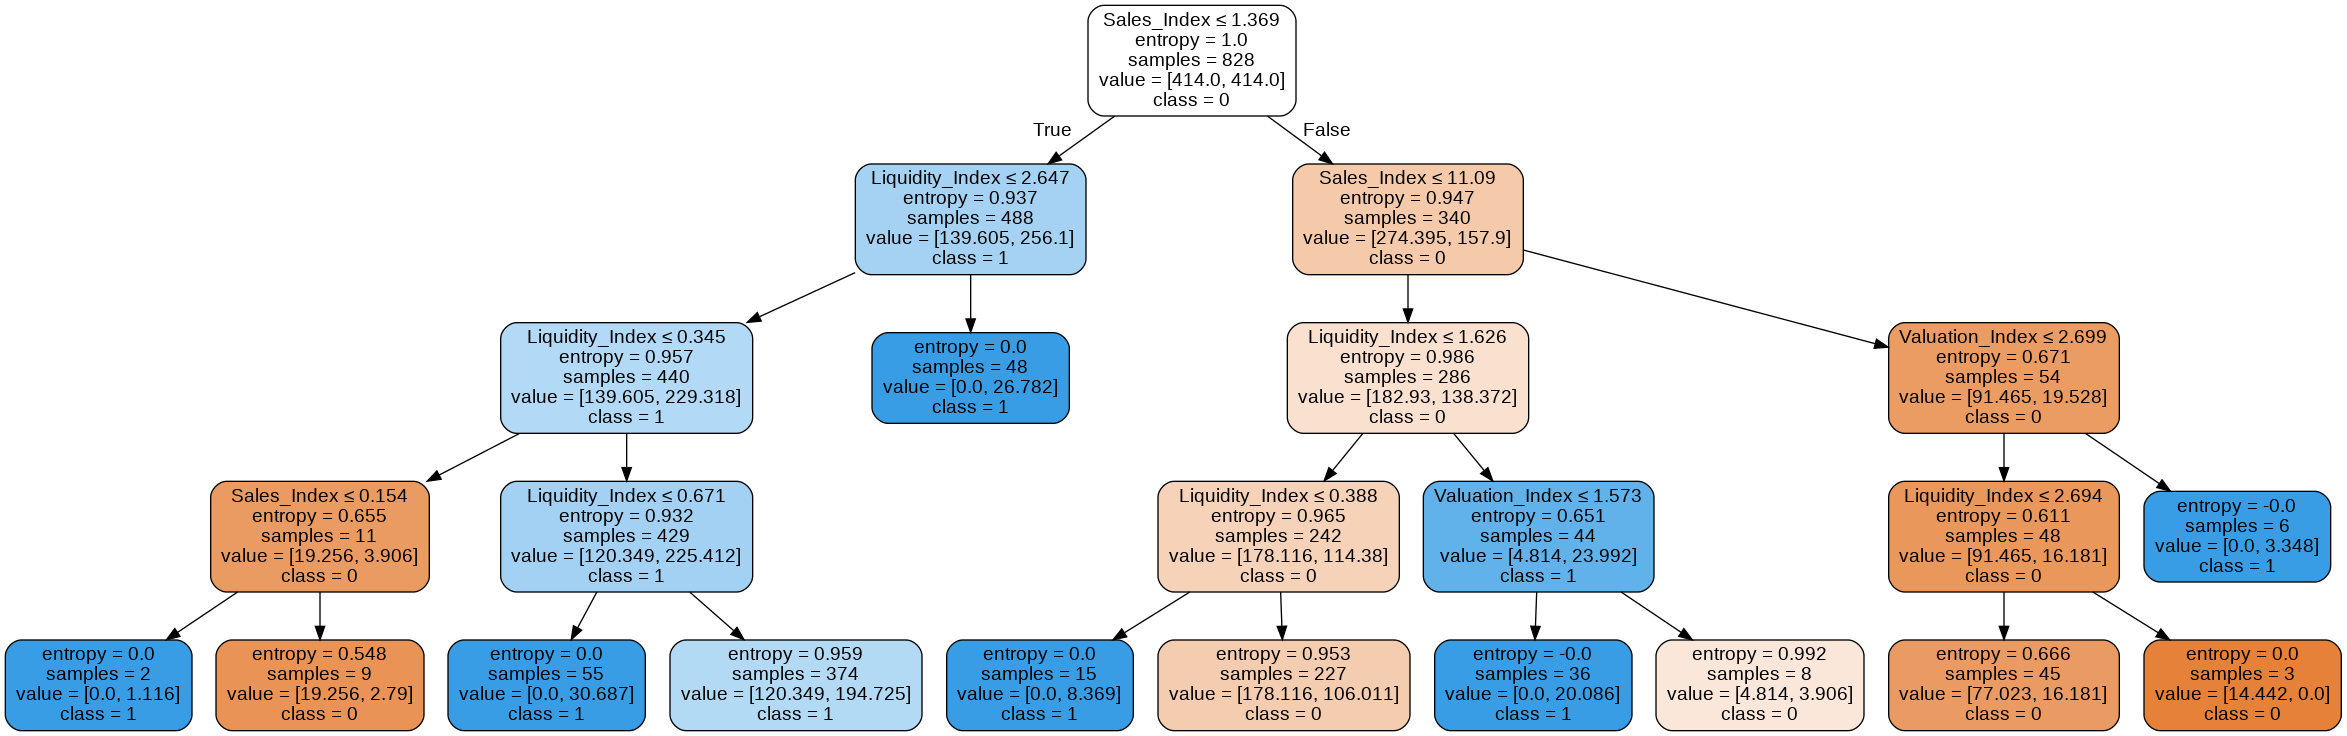

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('class.png')
Image(graph.create_png())

# **Modelling Test size = 5%**

# **Data Visualisation**


In [ ]:
# **First Technic analysis: Logistics Regression**

library(ggplot2)
ggplot(dat, aes(x=mpg, y=vs)) + geom_point() + stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE)

par(mar = c(4, 4, 1, 1)) # Reduce some of the margins so that the plot fits better
plot(dat$mpg, dat$vs)
curve(predict(logr_vm, data.frame(mpg=x), type="response"), add=TRUE) 

SyntaxError: ignored

In [ ]:
# **Second Technic analysis: Support Vector Machine (SVM)**

In [ ]:
# **Third Technic analysis: Decision Tree Model (DTM)**